In [1]:
# -*- coding: utf-8 -*-
"""
@author: Brigi
"""

# -*- coding: utf-8 -*-
"""
Created on Wed 4 Dec 18:01:45 2019

@author: Brigi
"""
# this is a widget which we can use in Jupyter notebooks
# https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#Numeric-widgets
# reason for choosing ipywidgets is it is easier to use than tkinter and did not need to install 
#any graphical packages in order to work with it
#while
# disadvantage is it is not working in spyder, only in jupyter notebooks
import ipywidgets as widgets


In [2]:
# widget allows us to change the parameters
# not parishes but population is the correct variable name
# Challange: Initially found widget int.Slider but this only displays integer numbers
# needed to set up float to display decimals.
# step to explain _________________________
# initial value to explain ___________________________
Parishes_parameter = widgets.FloatSlider(min=0,
    max=10,
    step=0.01,
    description='Parishes:',
    value=1.3)
display(Parishes_parameter)


FloatSlider(value=1.3, description='Parishes:', max=10.0, step=0.01)

In [3]:
Rats_parameter =widgets.FloatSlider(min=0,
    max=10,
    step=0.01,
    description='Rats:',
    value=0.8)
display(Rats_parameter)

FloatSlider(value=0.8, description='Rats:', max=10.0, step=0.01)

In [4]:
import csv
### used 'as' to shorten the name of matplotlib for easier use 
import matplotlib.pyplot as pyplot
import numpy

# def read_txt is a function which reads in the 2 files (rats and parishes) in the same time
# Instead of using f =open .... twice, the code is shorter using the function
# which has one parameter (passz)

#When the function is called, (lines 43  - rats= and  44 - parishes= ) we pass along the 
#read_text function name to open the txt files and convert them to float 

def read_txt (passz):
    #this is a doctest
    """
    >>> read_txt('Death_parishes.txt')[0][0]
    0.0
    
    """
    parishes = [] # create an empty list
    f= open (passz, newline='')
    reader = csv.reader(f)
    
    for row in reader: # A list of rows
        rowlist = [] # make a new list before each row is processed
       
        for value in row: # A list of value
            
             rowlist.append(float(value)) # do something with the values
             # converted values (string) to float 
            #print(value) # Floats - do something with values
        parishes.append(rowlist)
    return parishes

#calling the function to read in the rats and parishes file
rats = read_txt('death.rats.txt')
parishes = read_txt('Death_parishes.txt')

#parishes van hasznalva as a local valtozo (scope) miatt az egyik a fuggvenyen belul van a masik meg a fv kivul

#after importing numpy above, it is easier to call it and put the variables
#into a 2D array.
rats = numpy.array(rats)
parishes = numpy.array(parishes)

#Not neccesary, just checked if the 2D array is working correctly
#print (rats)
#print (parishes)

#This is step 2 where we calculate the avarage death using the given 
#equation
# this is the equation from the assignment2 description d = (0.8 x r) x (1.3 x p)
# changed the original values in the equation (from 0.8 and 1.3 respectively) 
# to the values which i have on the scrollbar widget. 
avg_death= (rats*Rats_parameter.value) * (parishes*Parishes_parameter.value)
print(avg_death)


# this is to write the absolute death out to a file
# Instead of f=open I used with open
with open('absolut_death.txt', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',')
    for row in avg_death: # go through all rows in avg_death
        rowlist = [] # make a new list before each row is processed
   
        for value in row: # A list of value egy sor minden oszlopan megy vegig
        
            rowlist.append(float(value)) # belefuzi az ertekeket
        
        #print(value) # Floats - do something with values
        spamwriter.writerow(rowlist)


[[    0.       0.       0.   ...  8536.32  8536.32  8536.32]
 [    0.       0.       0.   ...  8536.32  8536.32  8536.32]
 [    0.       0.       0.   ...  8536.32  8536.32  8536.32]
 ...
 [ 4680.    4680.    4680.   ...  3744.    3744.    3744.  ]
 [ 4680.    4680.    4680.   ...  3744.    3744.    3744.  ]
 [10670.4  10670.4  10670.4  ... 10670.4  10670.4  10670.4 ]]


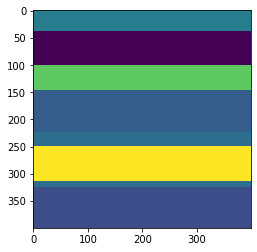

In [5]:
#this shows the parishes and the rats raster London maps
pyplot.imshow(rats)
pyplot.show()


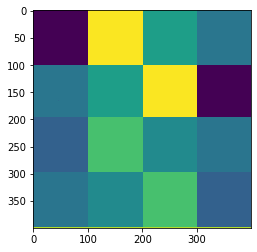

In [6]:
pyplot.imshow(parishes)
pyplot.show()

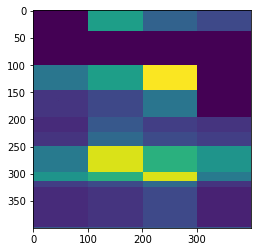

In [7]:
# when putting pyplot.show(avg_death) i received an error message
# took a while to figure out that dont need any keyword in the brackets
#colours dont change as propotions of rats and deaths comparing to each other
#does not change (numbers are changed in written out file)
pyplot.imshow(avg_death)
pyplot.show()

In [8]:
# to delete this, it's only a try for doctest
def add(a, b):
    """
    >>> add(1, 2)
    4
    """
    return a + b

add(1, 2)

3

In [9]:
import doctest
doctest.testmod(verbose=True)

Trying:
    add(1, 2)
Expecting:
    4
**********************************************************************
File "__main__", line 4, in __main__.add
Failed example:
    add(1, 2)
Expected:
    4
Got:
    3
Trying:
    read_txt('Death_parishes.txt')[0][0]
Expecting:
    0.0
ok
1 items had no tests:
    __main__
1 items passed all tests:
   1 tests in __main__.read_txt
**********************************************************************
1 items had failures:
   1 of   1 in __main__.add
2 tests in 3 items.
1 passed and 1 failed.
***Test Failed*** 1 failures.


TestResults(failed=1, attempted=2)

In [10]:
#change colours maybe? 
#display the total deaths per week